## Week 2

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### problem statement: car price prediction 
- brand value
- model type 
- misel
- no. of seats available
- leg space
- engine power/CC
- fuel options (categorical)
- color of the car (categorical)
- supply and demand - seasonality 
- IsLocking (boolean)
- maintenance_cost (categorical)
- insurance_price (categorical)
- automated/manual (categorical)
- diff between registration to purchase
- competition


-- life of the car
- distance travelled
- warrenty_CArd
- service_history
- insurance
- condition (categorical)

In [22]:
df = pd.read_csv('bmw_pricing_challenge.csv')
df.shape

(4843, 18)

In [23]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [24]:
df.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at'],
      dtype='object')

### EDA
- univariate analysis
        - missing values
        - outlier treatment
        - encoding
        - zero variance check
- bivariate analysis
         - correlation
         - scatterplot
         - outliers

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
maker_key            4843 non-null object
model_key            4843 non-null object
mileage              4843 non-null int64
engine_power         4843 non-null int64
registration_date    4843 non-null object
fuel                 4843 non-null object
paint_color          4843 non-null object
car_type             4843 non-null object
feature_1            4843 non-null bool
feature_2            4843 non-null bool
feature_3            4843 non-null bool
feature_4            4843 non-null bool
feature_5            4843 non-null bool
feature_6            4843 non-null bool
feature_7            4843 non-null bool
feature_8            4843 non-null bool
price                4843 non-null int64
sold_at              4843 non-null object
dtypes: bool(8), int64(3), object(7)
memory usage: 416.3+ KB


In [26]:
### missing values handling 
df.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

    #### if missing values, what should we do?
    1) column - wise mising values 
     - if a column has 80% values missing?  -  drop
     - if a column has 50% values missing (numerical)? - if filling -> mean, median, predictive model, filling with random values between 2 standard deviation
    10 features + Nth columne
    (100 rows -> missing50 rows(N))
     M1 -> data (10 columns + 50 rows) and target Nth colume (50 rows)

     - if a column has 50% values missing (categorical)? - if filling -> mode, 
        price  
        color (R-40, B - 30, other_c-30)

    2) row - wise missing values
     - 
        C1   C2 C3   target    (assume dataset is imbalanced)
    0    NA   <v1>         0
    1                      1
    2         <v3>     NA  0 

    95(1) and 5(0)
    0     0
    1     0
    2     1
    3     0
    4     1

    ---- sampling approach : - up-sampling and down-sampling (SMOTE)

### Explore
    relate categorical features with target
     - # 1) If any relation between model_key and mileage/ price?
    explore if any pattern exist between price and time

In [27]:
### Encoding - label encoding and OHE
categorical_f = df.select_dtypes('object').columns
df[categorical_f].head()

,maker_key,model_key,registration_date,fuel,paint_color,car_type,sold_at
0,BMW,118,2012-02-01,diesel,black,convertible,2018-01-01
1,BMW,M4,2016-04-01,petrol,grey,convertible,2018-02-01
2,BMW,320,2012-04-01,diesel,white,convertible,2018-02-01
3,BMW,420,2014-07-01,diesel,red,convertible,2018-02-01
4,BMW,425,2014-12-01,diesel,silver,convertible,2018-04-01


In [28]:
df.select_dtypes(np.object).columns

Index(['maker_key', 'model_key', 'registration_date', 'fuel', 'paint_color',
       'car_type', 'sold_at'],
      dtype='object')

In [29]:
for each in ['maker_key', 'model_key', 'fuel', 'paint_color',
       'car_type']:
     print(each, "=>",df[each].unique(), df[each].nunique())

maker_key => ['BMW'] 1
model_key => ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' '225 Active Tourer'
 '214 Gran Tourer'] 75
fuel => ['diesel' 'petrol' 'hybrid_petrol' 'electro'] 4
paint_color => ['black' 'grey' 'white' 'red' 'silver' 'blue' 'orange' 'beige' 'brown'
 'green'] 10
car_type => ['convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 '

In [30]:
#  1 2 3 4 5...10
#  1 0 0 0 0 0 0 
#  0 1 0 0 0 0 0

# 1) If any relation between model_key and mileage/ price?

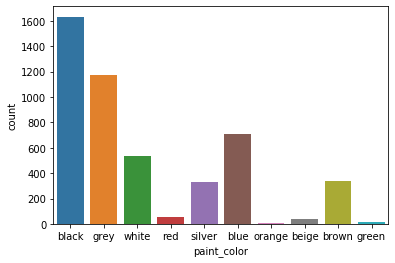

In [31]:
sns.countplot(df.paint_color)

# note: as per data black color has  huge demand than remaining colors, does black color cars have highest price range?

In [32]:
df.groupby('paint_color')['mileage','price'].mean().reset_index().sort_values('mileage')
## try to find out if any relationship between color of the car and mileage in real world?

,paint_color,mileage,price
6,orange,88756.333333,18866.666667
7,red,125155.615385,16500.000000
0,beige,128870.707317,15817.073171
9,white,129582.401487,17328.438662
3,brown,135704.771261,15367.741935
2,blue,138387.687324,15114.929577
5,grey,143757.417872,15595.744681
1,black,144289.800367,16173.851806
8,silver,146053.112462,14816.109422
4,green,195606.000000,7200.000000


In [33]:
for each in df.paint_color.unique():
    print(each, df[df.paint_color==each].describe())

# note: orange color  has hghes minimum price but frequency is least. Try to look for relationship between car color and per unit car price  

black             mileage  engine_power         price
count  1.633000e+03   1633.000000   1633.000000
mean   1.442898e+05    131.008573  16173.851806
std    6.310074e+04     38.979223   8874.971468
min   -6.400000e+01     25.000000    100.000000
25%    1.064040e+05    105.000000  10900.000000
50%    1.454710e+05    120.000000  14500.000000
75%    1.776710e+05    140.000000  19300.000000
max    1.000376e+06    317.000000  75000.000000
grey              mileage  engine_power          price
count    1175.000000   1175.000000    1175.000000
mean   143757.417872    129.268936   15595.744681
std     60480.526550     38.198944    9622.369714
min      5578.000000     70.000000     100.000000
25%    104144.500000    100.000000   10800.000000
50%    140631.000000    120.000000   14000.000000
75%    179102.500000    135.000000   17900.000000
max    477571.000000    317.000000  142800.000000
white              mileage  engine_power         price
count     538.000000    538.000000    538.000000
mea

In [35]:
## converting boolean features into binary  
boolean_f = df.select_dtypes('bool').columns
df[boolean_f].head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,True,True,False,False,True,True,True,False
1,True,True,False,False,False,True,True,True
2,False,False,False,False,True,False,True,False
3,True,True,False,False,True,True,True,True
4,True,True,False,False,False,True,True,True


In [36]:
for each in boolean_f:
     print(each, df[each].unique())

feature_1 [ True False]
feature_2 [ True False]
feature_3 [False  True]
feature_4 [False  True]
feature_5 [ True False]
feature_6 [ True False]
feature_7 [ True False]
feature_8 [False  True]


In [37]:
for col in boolean_f:
    df[col] = df[col].apply(lambda x: 1 if x== True else 0)

In [38]:
df[boolean_f].head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,1,1,0,0,1,1,1,0
1,1,1,0,0,0,1,1,1
2,0,0,0,0,1,0,1,0
3,1,1,0,0,1,1,1,1
4,1,1,0,0,0,1,1,1


In [39]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,1,1,0,0,1,1,1,0,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,1,1,0,0,0,1,1,1,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,0,0,0,0,1,0,1,0,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,1,1,0,0,1,1,1,1,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,1,1,0,0,0,1,1,1,33400,2018-04-01


### Price pattern w.r.t. time analysis

In [40]:
## converting time columns as time type
df.registration_date = pd.to_datetime(df.registration_date)
df.sold_at = pd.to_datetime(df.sold_at)

In [41]:
###  Exacting time components from time columns
df['reg_year'] = df.registration_date.dt.year
df['reg_month'] = df.registration_date.dt.month
df['reg_weekday'] = df.registration_date.dt.weekday
df['reg_weekday_yr'] = df.registration_date.dt.weekofyear

df['sold_year'] = df.sold_at.dt.year
df['sold_month'] = df.sold_at.dt.month
df['sold_weekday'] = df.sold_at.dt.weekday
df['sold_weekday_yr'] = df.sold_at.dt.weekofyear

df['diff_reg_sold'] = df.sold_at - df.registration_date
df.diff_reg_sold = df.diff_reg_sold.apply(lambda x: str(x).split()[0])

# year difference between sold year and registration year
df['year_diff']  = df.sold_year - df.reg_year 

Text(0, 0.5, 'Price')

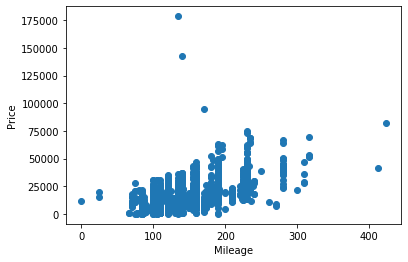

In [42]:
plt.scatter(df.engine_power, df.price)
plt.xlabel('Mileage')
plt.ylabel('Price')
# note: as mileage increasing price range is also increasing

### assignment: plot relationship between price range and mileage

Text(0, 0.5, 'Price of the car')

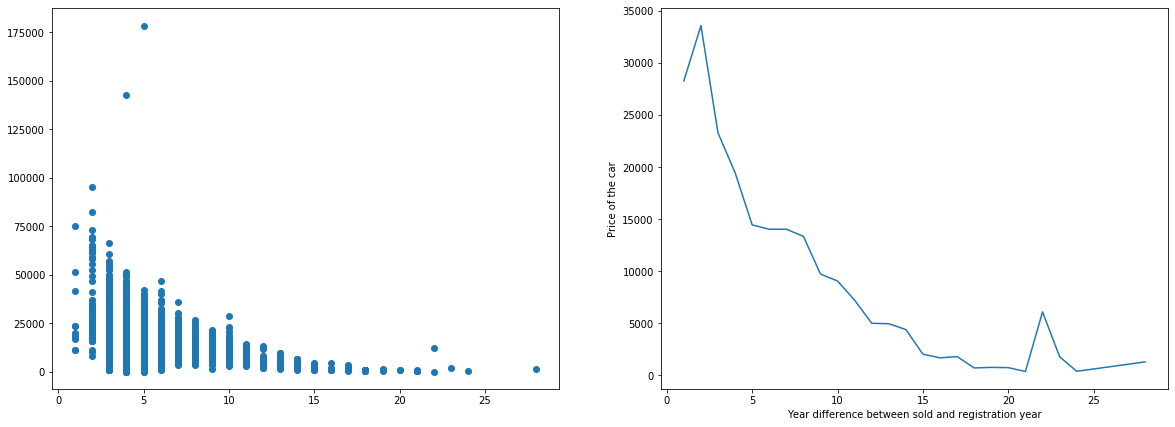

In [43]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
ax[0].scatter(df['year_diff'] .astype('object'), df.price)
# hypothesis: as the car grows older, actual worth will decrease
plt.xlabel('Year difference between sold and registration year')
plt.ylabel('Price of the car')

x = df.groupby('year_diff')['price'].mean().reset_index()
ax[1].plot(x['year_diff'], x.price)
# hypothesis: as the car grows older, actual worth will decrease
plt.xlabel('Year difference between sold and registration year')
plt.ylabel('Price of the car')
# validate the hypothesis

Text(0, 0.5, 'Price of the car')

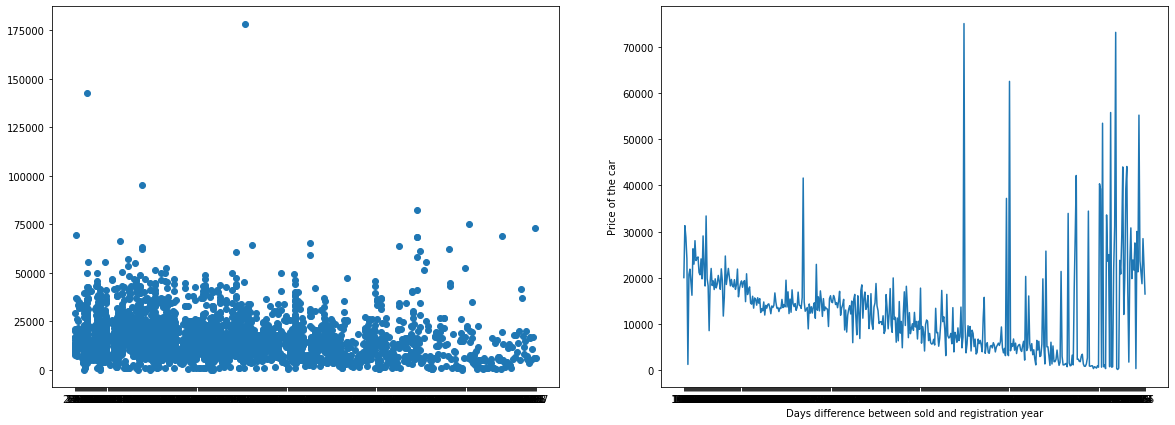

In [44]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
ax[0].scatter(df['diff_reg_sold'] .astype('object'), df.price)
# hypothesis: as the car grows older, actual worth will decrease
plt.xlabel('Days difference between sold and registration year')
plt.ylabel('Price of the car')

x = df.groupby('diff_reg_sold')['price'].mean().reset_index()
ax[1].plot(x['diff_reg_sold'], x.price)
# hypothesis: as the car grows older, actual worth will decrease
plt.xlabel('Days difference between sold and registration year')
plt.ylabel('Price of the car')
# validate the hypothesis

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (20,10))
sns.scatterplot(df.reg_month, df.price, ax = ax[0,0])
plt.xlabel('Registration Month')
plt.ylabel('Price of the car')


sns.scatterplot(df.reg_weekday, df.price, ax = ax[1,0], color = 'green')
plt.xlabel('Registration Weekdays')
plt.ylabel('Price of the car')


sns.scatterplot(df.sold_weekday, df.price, ax = ax[0,1], color = 'c')
plt.xlabel('Sold Weekdays')
plt.ylabel('Price of the car')

sns.scatterplot(df.sold_month, df.price, ax = ax[1,1], color = 'm')
plt.xlabel('Sold Months')
plt.ylabel('Price of the car')
# note: looking for seasonality impact on price, however, second hand cars price do not seems to have seasonality impact

Text(0, 0.5, 'Price of the car')

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (20,10))
x = df.groupby('reg_month')['price'].mean().reset_index()
ax[0,0].plot(x.reg_month, x.price)
plt.xlabel('Registration Month')
plt.ylabel('Price of the car')

x = df.groupby('reg_weekday')['price'].mean().reset_index()
ax[1,0].plot(x.reg_weekday, x.price, color = 'green')
plt.xlabel('Registration Weekdays')
plt.ylabel('Price of the car')

x = df.groupby('sold_weekday')['price'].mean().reset_index()
ax[0,1].plot(x.sold_weekday, x.price, color = 'c')
plt.xlabel('Sold Weekdays')
plt.ylabel('Price of the car')

x = df.groupby('sold_month')['price'].mean().reset_index()
ax[1,1].plot(x.sold_month, x.price,color = 'm')
plt.xlabel('Sold Months')
plt.ylabel('Price of the car')
# note: looking for seasonality impact on price, however, second hand cars price do not seems to have seasonality impact